# SVM


## Package Loading

In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle
import seaborn as sns
Categories=['trash','recycle','organics', 'hazardous']

## Mount to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Data

### Load Training Data

In [ ]:
flat_data_arr=[]
target_arr=[]

#mount the drive and give path of the parent-folder containing all category images folders.
datadir='/content/drive/MyDrive/APS360/APS360data/train'
for i in Categories:
  print(f'loading... category for training data: {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df_train=pd.DataFrame(flat_data)
df_train['Target']=target
df_train

loading... category for training data: trash
loaded category:trash successfully
loading... category for training data: recycle
loaded category:recycle successfully
loading... category for training data: organics
loaded category:organics successfully
loading... category for training data: hazardous
loaded category:hazardous successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.807843,0.796078,0.768627,0.807885,0.796121,0.768670,8.104828e-01,0.798718,0.771267,0.811756,...,0.567400,0.583087,0.587008,0.563109,0.578795,0.582717,0.558552,0.574238,0.578160,0
1,0.960784,0.960784,0.960784,0.960784,0.960784,0.960784,9.607843e-01,0.960784,0.960784,0.960784,...,0.960784,0.960784,0.960784,0.960784,0.960784,0.960784,0.960784,0.960784,0.960784,0
2,0.419843,0.325725,0.278667,0.419843,0.325725,0.278667,4.198431e-01,0.325725,0.278667,0.420250,...,0.254667,0.231137,0.231137,0.254667,0.231137,0.231137,0.254667,0.231137,0.231137,0
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
4,0.847918,0.738114,0.694977,0.854672,0.744868,0.701731,8.535810e-01,0.743777,0.700640,0.858682,...,0.586642,0.508210,0.465073,0.578793,0.500362,0.457224,0.569870,0.491439,0.448302,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.152941,0.168627,0.164706,0.152941,0.168627,0.164706,1.529412e-01,0.168627,0.164706,0.152941,...,0.704006,0.700076,0.683959,0.700041,0.696110,0.680426,0.716047,0.712115,0.696432,3
596,0.430586,0.407054,0.896843,0.427084,0.403551,0.893340,4.235817e-01,0.400050,0.889446,0.423501,...,0.385222,0.346436,0.878450,0.389734,0.350501,0.880234,0.388202,0.348970,0.878695,3
597,0.196078,0.200000,0.180392,0.196078,0.200000,0.180392,1.960784e-01,0.200000,0.180392,0.196078,...,0.841033,0.829840,0.809084,0.603715,0.574101,0.542797,0.830137,0.802996,0.771473,3
598,0.005499,0.593734,0.927125,0.000386,0.588622,0.925876,2.612041e-07,0.588236,0.929354,0.000053,...,0.001236,0.549731,0.922101,0.000296,0.552989,0.919609,0.000045,0.556148,0.917018,3


In [ ]:
x_train=df_train.iloc[:,:-1]
y_train=df_train.iloc[:,-1]

### Loading Validation data

In [ ]:
flat_data_arr=[]
target_arr=[]

#mount the drive and give path of the parent-folder containing all category images folders.
datadir='/content/drive/MyDrive/APS360/APS360data/val'
for i in Categories:
  print(f'loading... category for training data: {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df_val=pd.DataFrame(flat_data)
df_val['Target']=target
df_val

loading... category for training data: trash
loaded category:trash successfully
loading... category for training data: recycle
loaded category:recycle successfully
loading... category for training data: organics
loaded category:organics successfully
loading... category for training data: hazardous
loaded category:hazardous successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.900031,0.845129,0.794148,0.891644,0.836742,0.785761,0.895579,0.840677,0.789696,0.904088,...,0.347732,0.332046,0.284987,0.343146,0.327459,0.280401,0.337860,0.322174,0.275115,0
1,0.982314,0.939177,0.868589,0.979762,0.936625,0.866037,0.969735,0.926598,0.856009,0.964058,...,0.623571,0.584355,0.537297,0.619557,0.580342,0.533283,0.610493,0.571277,0.524218,0
2,0.810921,0.752098,0.677588,0.810800,0.751977,0.677467,0.803399,0.744576,0.670066,0.802203,...,0.483388,0.448094,0.389270,0.485399,0.450105,0.391282,0.485433,0.450139,0.391315,0
3,0.858824,0.772549,0.717647,0.858866,0.772591,0.717689,0.861463,0.775189,0.720287,0.862737,...,0.397913,0.358698,0.311639,0.390265,0.351049,0.303990,0.381045,0.341829,0.294770,0
4,0.637619,0.621933,0.586639,0.675926,0.660240,0.624946,0.687788,0.672101,0.636807,0.632280,...,0.502680,0.475245,0.412557,0.451185,0.427233,0.377458,0.381802,0.358273,0.310773,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3
196,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3
197,0.580397,0.611769,0.623534,0.581317,0.612689,0.624454,0.584311,0.615683,0.627448,0.586695,...,0.578403,0.573563,0.605433,0.614009,0.606587,0.648457,0.619361,0.611518,0.654655,3
198,0.996078,1.000000,0.980392,0.996078,1.000000,0.980392,0.996078,1.000000,0.980392,0.996078,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3


In [ ]:
x_val=df_val.iloc[:,:-1]
y_val=df_val.iloc[:,-1]

### Loading Test Data

In [ ]:
flat_data_arr=[]
target_arr=[]

#mount the drive and give path of the parent-folder containing all category images folders.
datadir='/content/drive/MyDrive/APS360/APS360data/test'
for i in Categories:
  print(f'loading... category for training data: {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df_test=pd.DataFrame(flat_data)
df_test['Target']=target
df_test

loading... category for training data: trash
loaded category:trash successfully
loading... category for training data: recycle
loaded category:recycle successfully
loading... category for training data: organics
loaded category:organics successfully
loading... category for training data: hazardous
loaded category:hazardous successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.878431,0.811765,0.749020,0.878431,0.811765,0.749020,0.878431,0.811765,0.749020,0.878429,...,0.810483,0.747738,0.684993,0.807885,0.745140,0.682395,0.807843,0.745098,0.682353,0
1,0.854902,0.803922,0.729412,0.854944,0.803964,0.729454,0.857542,0.806561,0.732051,0.858820,...,0.329488,0.298115,0.247135,0.329412,0.298039,0.247059,0.329412,0.298039,0.247059,0
2,0.824135,0.718252,0.675115,0.829378,0.723496,0.680358,0.831443,0.725561,0.682423,0.835124,...,0.631804,0.557294,0.502392,0.626392,0.551882,0.496980,0.617926,0.543416,0.488514,0
3,0.659429,0.592762,0.522174,0.664672,0.598006,0.527417,0.666661,0.599995,0.529406,0.666664,...,0.362617,0.323402,0.276343,0.364724,0.325509,0.278450,0.364766,0.325550,0.278491,0
4,0.913725,0.862745,0.788235,0.913725,0.862745,0.788235,0.913725,0.862745,0.788235,0.913725,...,0.209886,0.158906,0.084396,0.228973,0.177993,0.103483,0.232201,0.181221,0.106711,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.367030,0.186637,0.186695,0.371383,0.190991,0.194912,0.375717,0.195325,0.203110,0.380721,...,0.445374,0.194390,0.007192,0.441410,0.190430,0.002196,0.444278,0.193297,0.005064,3
196,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3
197,0.156863,0.149020,0.168627,0.156863,0.149020,0.168627,0.156863,0.149020,0.168627,0.156863,...,0.152941,0.145098,0.164706,0.152941,0.145098,0.164706,0.152941,0.145098,0.164706,3
198,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3


In [ ]:
x_test=df_test.iloc[:,:-1]
y_test=df_test.iloc[:,-1]

# Grid Search

I have done the grid search for different set of hyperparameters:

C: [0.1, 1, 10, 100]

gamma: [0.0001, 0.001, 0,1, 1]

kernel: [rpf, poly]

Here I only shows the final result of the best set of parameters, which is C=100, gamma=0.0001 and kernel is rbf

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
param_grid={'C':[100],'gamma':[0.0001],'kernel':['rbf']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
y_pred_val=model.predict(x_val)

svm_val_precision = precision_score(y_val, y_pred_val, average='weighted')  # evaluate precision on val set
svm_val_recall = recall_score(y_val, y_pred_val, average='weighted')        # evaluate recall on val set
svm_val_F1_score = f1_score(y_val, y_pred_val, average = 'weighted')        # evaluate F1-score on val set

print(f'SVM on validation set has a weighted precision of: {svm_val_precision}')
print(f'SVM on validation set has a weighted recall of: {svm_val_recall}')
print(f'SVM on validation set has a weighted F1-score of:  {svm_val_F1_score}')

SVM on validation set has a weighted precision of: 0.7166470183711563
SVM on validation set has a weighted recall of: 0.71
SVM on validation set has a weighted F1-score of:  0.707317572228653


## Confusion Matrix On Validation Set

In [ ]:
def confusion_matrix_creation_SVM(y_test, y_pred_test, col_names, modelName, color):

    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as pl
    import numpy as np

    # Forming confusion matrix
    CM = confusion_matrix(y_test, y_pred_test)
    pl.figure(figsize=(12,8))
    sns.heatmap(CM, annot=True, annot_kws={'size':15}, fmt=".0f", cmap=color, linewidths=5)

    # labels in plot
    tick_marks = np.arange(len(col_names))
    pl.xticks(tick_marks + 0.5, col_names)
    pl.yticks(tick_marks + 0.5, col_names, rotation=0)
    pl.xlabel('Predicted label')
    pl.ylabel('True label')
    pl.title(f'Confusion Matrix of {modelName}')
    pl.show()

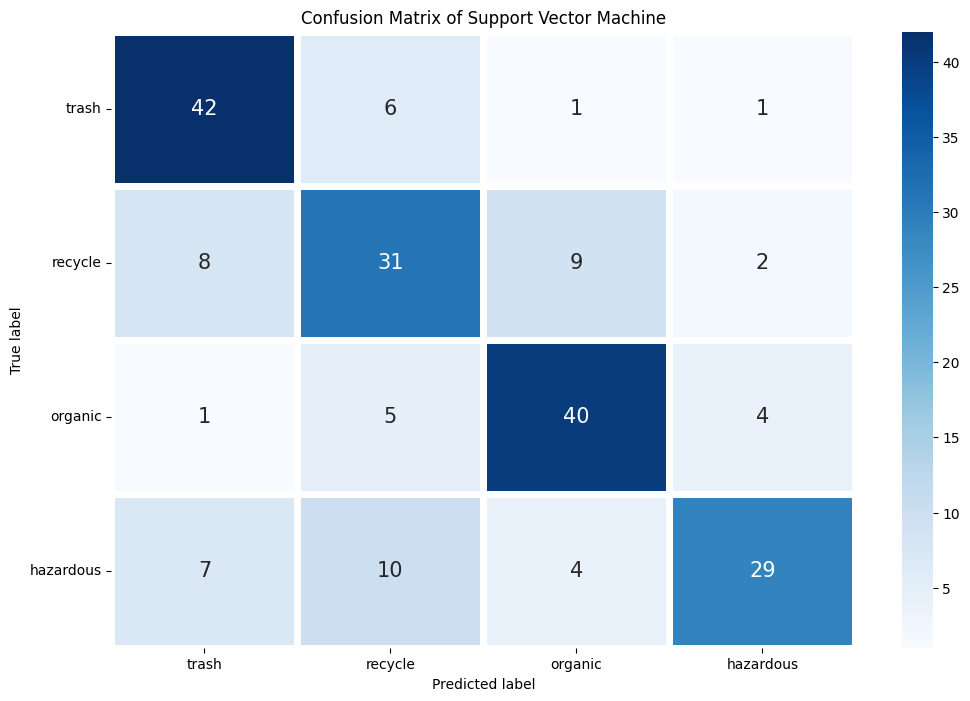

In [ ]:
confusion_matrix_creation_SVM(y_val, y_pred_val,['trash','recycle','organic', 'hazardous'], "Support Vector Machine", "Blues")

# Performance on the test set

In [ ]:
y_pred_test=model.predict(x_test)
svm_test_precision = precision_score(y_test, y_pred_test, average='weighted')  # evaluate precision on test set
svm_test_recall = recall_score(y_test, y_pred_test, average='weighted')        # evaluate recall on test set
svm_test_F1_score = f1_score(y_test, y_pred_test, average = 'weighted')        # evaluate F1-score on test set

print(f'SVM on test set has a weighted precision of: {svm_test_precision}')
print(f'SVM on test set has a weighted recall of: {svm_test_recall}')
print(f'SVM on test set has a weighted F1-score of: {svm_test_F1_score}')


SVM on test set has a weighted precision of: 0.7244174265450861
SVM on test set has a weighted recall of: 0.72
SVM on test set has a weighted F1-score of: 0.7184803537902323


## Confusion Matrix On Test Set

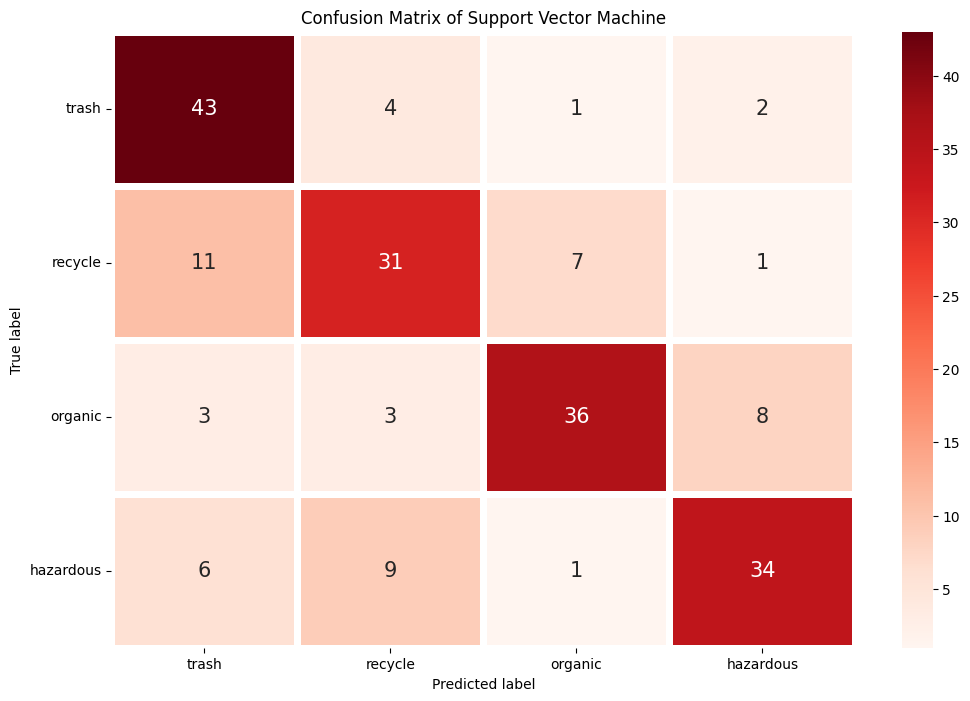

In [ ]:
confusion_matrix_creation_SVM(y_test, y_pred_test,['trash','recycle','organic', 'hazardous'], "Support Vector Machine", "Reds")